In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_series, load_data_preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM, Dropout, Input
from sklearn.preprocessing import MinMaxScaler


2023-11-28 10:20:48.240491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/DataQ/Tugas Akhir/lstm-predict-potato-price/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
series = load_data_preprocessing('KTG')
series

array([ 9000.,  9000.,  9000., ..., 11000., 11000., 11000.])

In [3]:

scaler = MinMaxScaler()
series_norm = scaler.fit_transform(series.reshape(-1,1))



In [4]:
time = np.arange(len(series_norm), dtype="float32")

# Define the split time
split_time = 800

# Get the train set 
time_train = time[:split_time]
x_train = series_norm[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series_norm[split_time:]



In [5]:
x_valid

array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

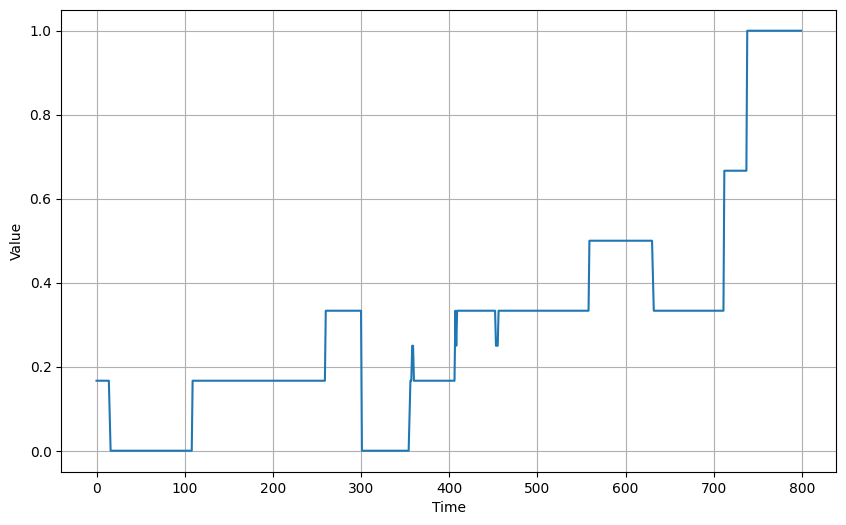

In [6]:
# Plot the train set
plot_series(time_train, x_train)

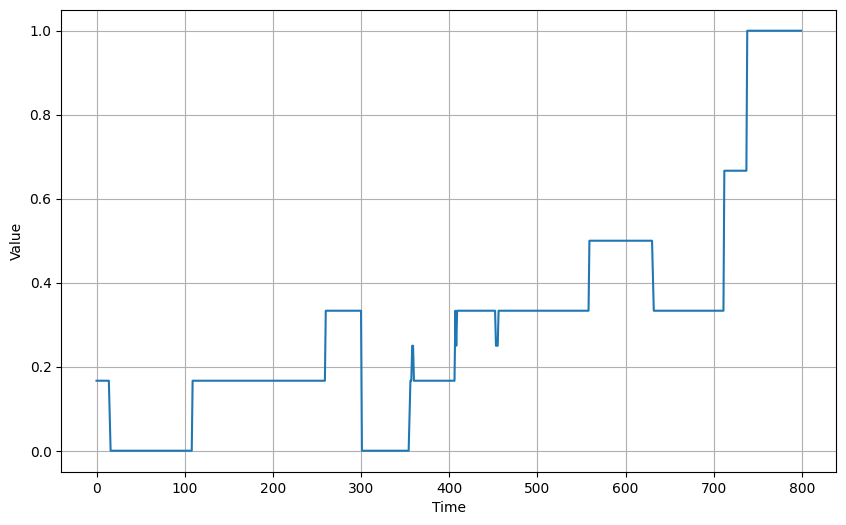

In [7]:
# Plot the train set
plot_series(time_train, x_train)

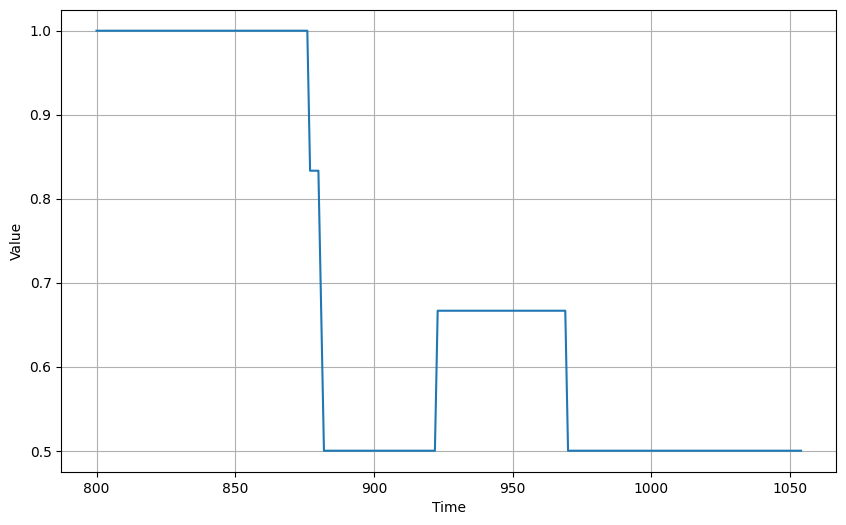

In [8]:
# Plot the validation set
plot_series(time_valid, x_valid)

In [9]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [10]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [11]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [12]:
# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20, 1)
shape of second element: (32, 1)


In [13]:
# Build the single layer neural network
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331 (1.29 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.5))

In [15]:
# Train the model
model_baseline.fit(dataset,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.1993
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1990
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1988
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1985
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1983
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1980
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1977
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1975
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1972
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1969
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1964
Epoch 13/100
25/25 [=================

In [16]:

# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series_norm[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))


1/1 [==============================] - 0s 19ms/step


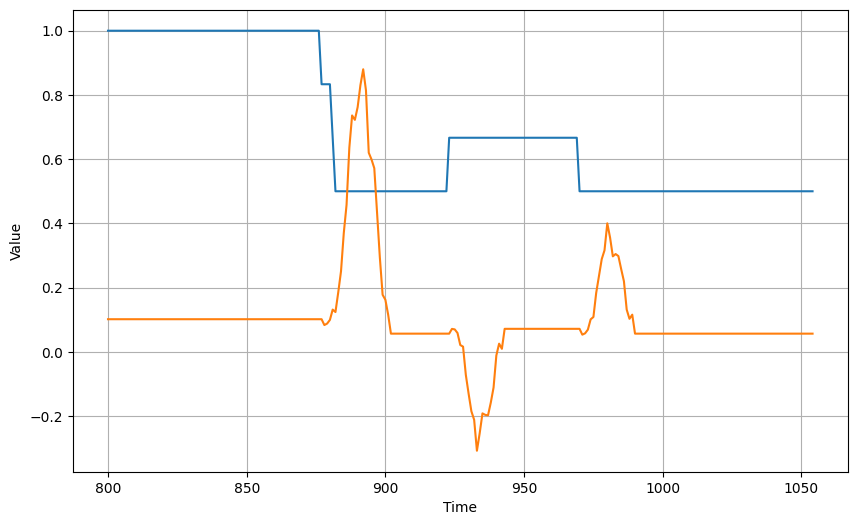

In [17]:
# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()
plot_series(time_valid, (x_valid, results))

In [18]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

[0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.55149436
 0.55149436 0.55149436 0.55149436 0.33695668 0.17797452 0.17797452
 0.17797452 0.17797452 0.17797452 0.17797452 0.17797452 0.1779

In [19]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

In [20]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [21]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

In [22]:
# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.0313 - lr: 1.0000e-08
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0313 - lr: 1.1220e-08
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0313 - lr: 1.2589e-08
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0313 - lr: 1.4125e-08
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0313 - lr: 1.5849e-08
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0312 - lr: 1.7783e-08
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0312 - lr: 1.9953e-08
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0312 - lr: 2.2387e-08
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0312 - lr: 2.5119e-08
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0312 - lr: 2.8184e-08
Epoch 11/100
25/25 [=========

(1e-08, 0.001, 0.0, 0.03)

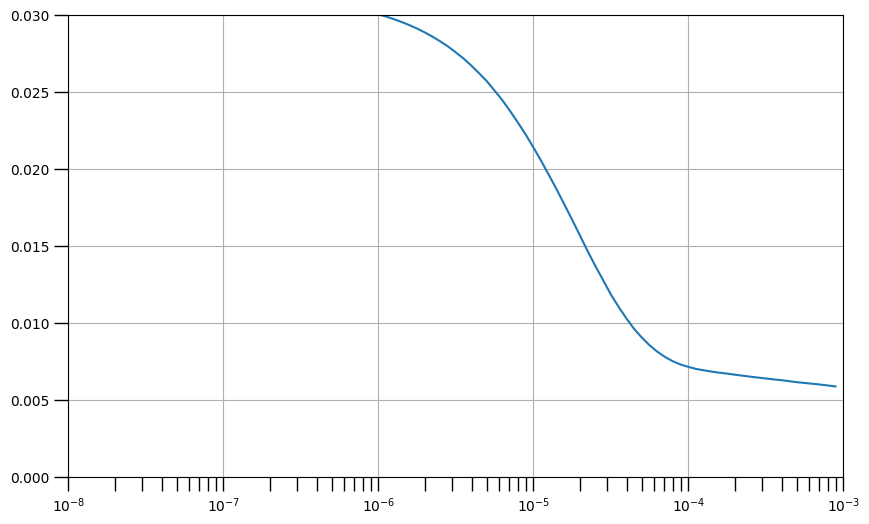

In [23]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0,0.03])

In [24]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [25]:
# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)

In [26]:
# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100)

Epoch 1/100


25/25 [==============================] - 1s 3ms/step - loss: 0.1480
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1452
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1421
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1390
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1359
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1330
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1301
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1273
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1245
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1219
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1192
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1166
Epoch 13/100
25/25 [=============================

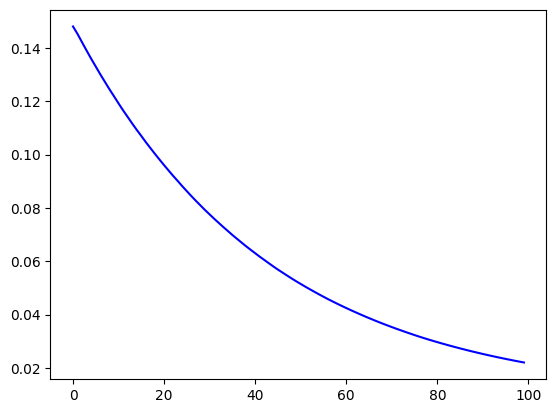

In [27]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

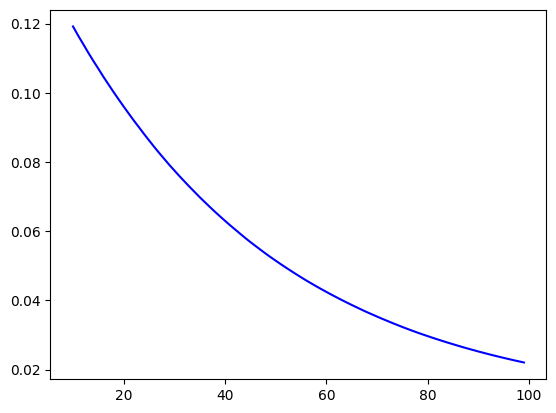

In [28]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [29]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series_norm[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))


1/1 [==============================] - 0s 19ms/step


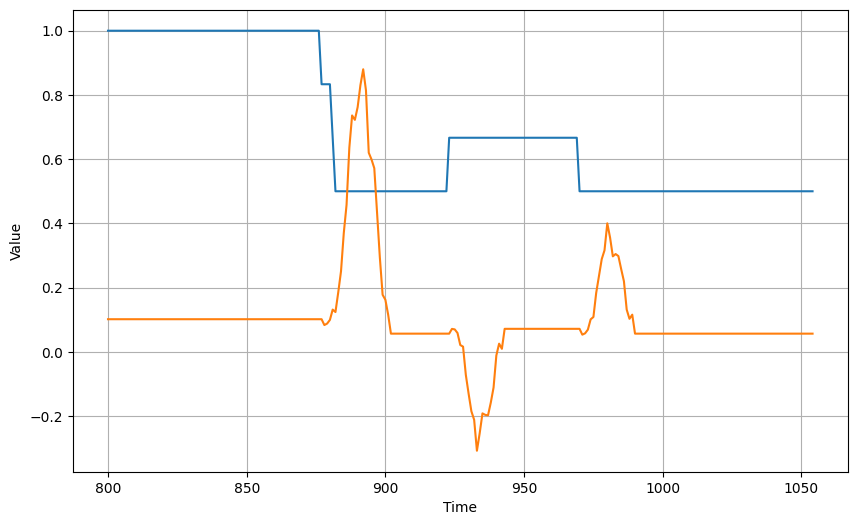

In [30]:
# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()
plot_series(time_valid, (x_valid, results))

In [31]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

[0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774
 0.82158774 0.82158774 0.82158774 0.82158774 0.82158774 0.55149436
 0.55149436 0.55149436 0.55149436 0.33695668 0.17797452 0.17797452
 0.17797452 0.17797452 0.17797452 0.17797452 0.17797452 0.1779